# Linear Regression with One Variable from Scratch

## Problem Statement

Formulate a mathematical function f(x) which takes 'x' as input and predicts the correct value for 'y' according to the dataset given below. x and y are both floating point numbers.

## Required Libraries

In [1]:
# pandas for data processing
import pandas as pd

# numpy for mathematical calculations
import numpy as np

# matplotlib for visualization
import matplotlib.pyplot as plt

## DataSet 

https://www.kaggle.com/andonians/random-linear-regression/data

### 1.1 Read the Data

In [2]:
# path of the dataset
path = r'E:\git-work\projects\11. Machine Learning from Scratch\Linear Regression in One Variable\Data\train.csv'

# read the dataset
data = pd.read_csv(path)
print("Shape of the dataset = {}".format(data.shape))

# lets see first 5 rows of the dataset
data.head(5)

Shape of the dataset = (700, 2)


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


### 1.2 Clean the data

In [3]:
# drop any rows with 'nan' values
data = data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


### 1.3 Visualize the Data

Text(0,0.5,'y')

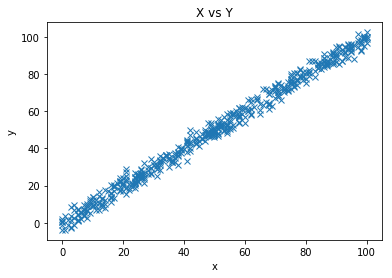

In [4]:
# let's visualize the dataset
plt.plot(data.x[0:500], data.y[0:500], 'x')
plt.title("X vs Y")
plt.xlabel("x")
plt.ylabel("y")

### 1.4 Break into Train and Cross-Valid Set

In [5]:
# training dataset and labels
train_dataset = np.array(data.x[0:500]).reshape(500,1)
train_labels  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
valid_dataset = np.array(data.x[500:700]).reshape(199,1)
valid_labels  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Dataset Shape = {}".format(train_dataset.shape))
print("Train Labels  Shape = {}".format(train_labels.shape))
print("Valid Dataset Shape = {}".format(valid_dataset.shape))
print("Valid Labels  Shape = {}".format(valid_labels.shape))

Train Dataset Shape = (500, 1)
Train Labels  Shape = (500, 1)
Valid Dataset Shape = (199, 1)
Valid Labels  Shape = (199, 1)


## Forward propagation

Equation for the function is:

f(x) = w*x + b

where **w** and **b** are the parameters we will learn through training.

In [6]:
def forward_propagation(train_dataset, parameters):
    w = parameters['w']
    b = parameters['b']
    predictions = np.multiply(w, train_dataset) + b
    return predictions

## Define Cost Function

Mean Squared Error

cost = [(y - f(x)) ^ 2] * 0.5 

where **y** are the actual or true labels and **f(x)** are the predicted values.

In [7]:
def cost_function(predictions, train_labels):
    cost = np.mean((train_labels - predictions) ** 2) * 0.5
    return cost

## Gradient Descent for Backpropagation 

Using Chain Rule:

c = cost <br>
f = f(x)

* Partial Derivative of **cost function** w.r.t **w** <br>
dc/dw = dc/df * df/dw <br>
* Partial Derivative of **cost function** w.r.t **b**<br>
dc/db = dc/df * df/db <br>

Partial Derivatives:


* dc/df = (y - f) * -1
* df/dw = x
* df/db = 1


In [8]:
def backward_propagation(train_dataset, train_labels, predictions):
    derivatives = dict()
    df = (train_labels - predictions) * -1
    dw = np.mean(np.multiply(train_dataset, df))
    db = np.mean(df)
    derivatives['dw'] = dw
    derivatives['db'] = db
    return derivatives

## Update the Parameters

* w = w - (learning_rate * dw)
* b = b - (learning_rate * db)

In [9]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['w'] = parameters['w'] - learning_rate * derivatives['dw']
    parameters['b'] = parameters['b'] - learning_rate * derivatives['db']
    return parameters

## Train the Data

Sequence of Steps:

1. Forward Propagtaion
2. Cost Function
3. Backward Propagation
4. Update Parameters

In [13]:
def train(train_dataset, train_labels, learning_rate, iters = 10):
    #random parameters
    parameters = dict()
    parameters["w"] = np.random.uniform(0,1) * -1
    parameters["b"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_dataset, parameters)
        
        #cost function
        cost = cost_function(predictions, train_labels)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        plt.plot(train_dataset, train_labels, 'x')
        plt.plot(train_dataset, predictions, 'o')
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_dataset, train_labels, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training

Iteration = 1, Loss = 6530.17610864342


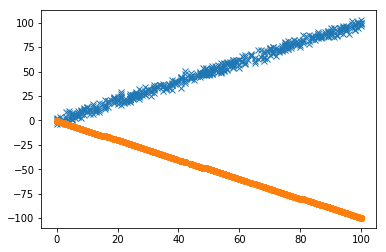

Iteration = 2, Loss = 2964.8942034071056


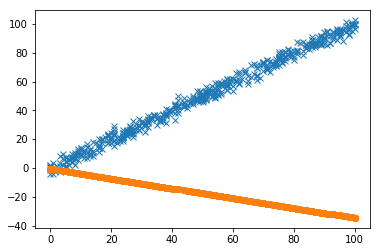

Iteration = 3, Loss = 1347.3218534523212


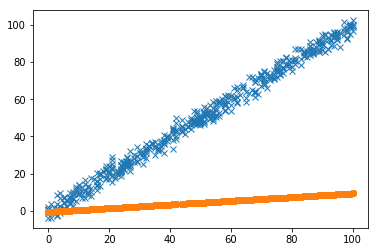

Iteration = 4, Loss = 613.4274860921677


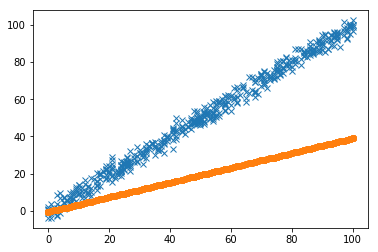

Iteration = 5, Loss = 280.45879823337685


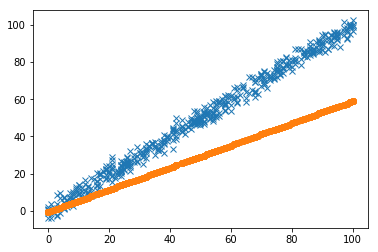

Iteration = 6, Loss = 129.39053524618575


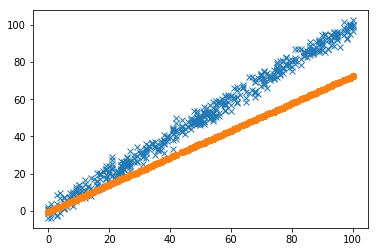

Iteration = 7, Loss = 60.850696503671685


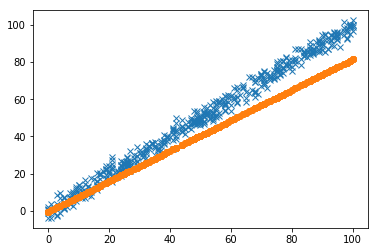

Iteration = 8, Loss = 29.75409525287678


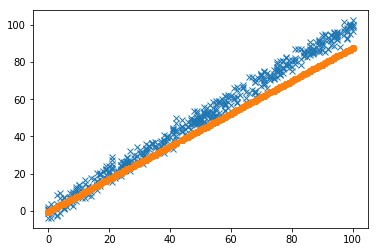

Iteration = 9, Loss = 15.645532325772797


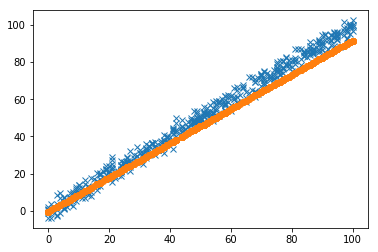

Iteration = 10, Loss = 9.244461202803762


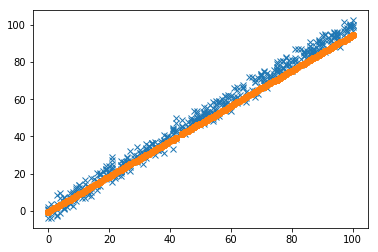

Iteration = 11, Loss = 6.34028764853131


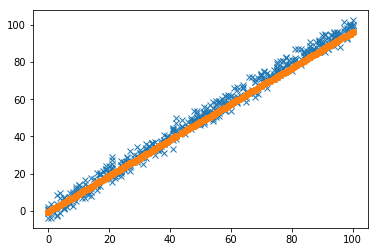

Iteration = 12, Loss = 5.022660394509323


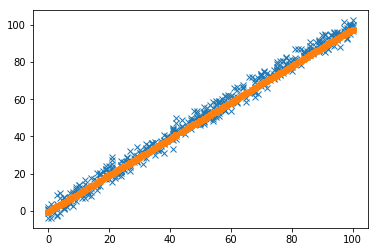

Iteration = 13, Loss = 4.424850954260021


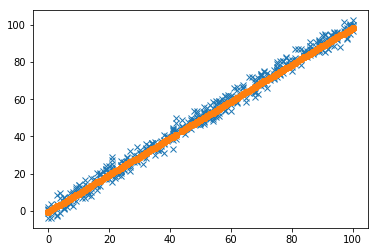

Iteration = 14, Loss = 4.153623653444229


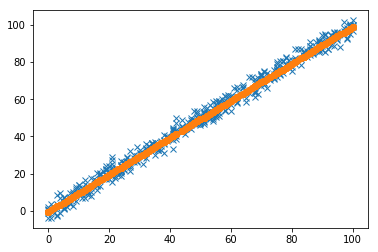

Iteration = 15, Loss = 4.03056703105022


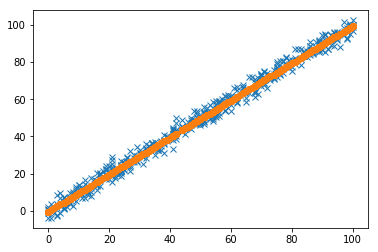

Iteration = 16, Loss = 3.974735609601091


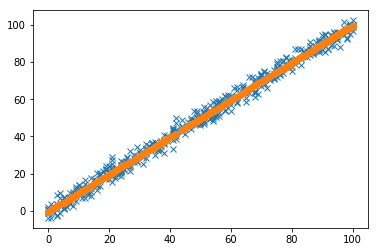

Iteration = 17, Loss = 3.9494043363070204


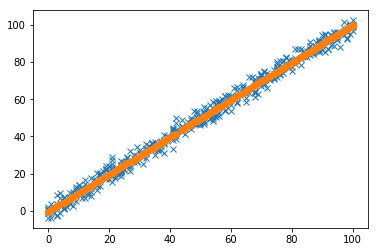

Iteration = 18, Loss = 3.9379110140390834


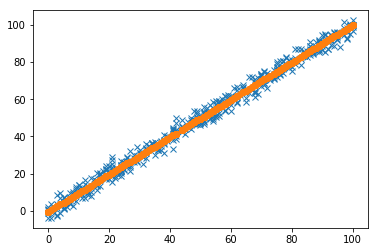

Iteration = 19, Loss = 3.9326959855041483


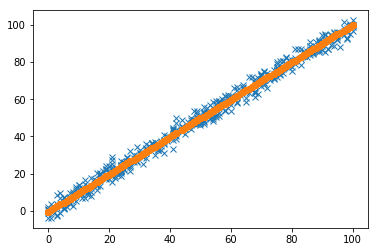

Iteration = 20, Loss = 3.930329425814933


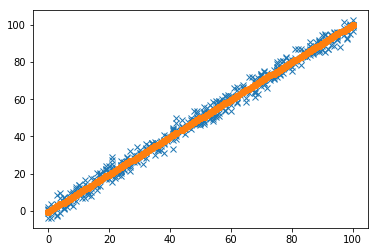

In [14]:
parameters,loss = train(train_dataset, train_labels, 0.0001, 20)

## Make Predictions for Valid Dataset

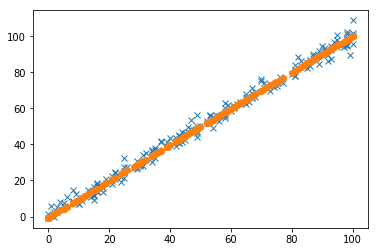

In [16]:
valid_predicitons = valid_dataset * parameters["w"] + parameters["b"]
plt.figure()
plt.plot(valid_dataset, valid_labels, 'x')
plt.plot(valid_dataset, valid_predictions, 'o')
plt.show()

In [17]:
#cost for valid dataset
cost_function(valid_predictions, valid_labels)

4.088684965601558